In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.close('all')
from matplotlib import pyplot
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Consumption of fossil fuels(Coal, Natural Gas, Petroleum)

In [2]:
# Read the file and add the content to dataframe
dir="C:\\Users\\poonam\\Desktop\\FIU\\2019 Fall\\Data Science\\Data sets for project\\consumption dataset\\"
df_coal=pd.read_csv(dir+"coal-consumption-by-country-terawatt-hours-twh.csv")
df_coal['source']="coal"
df_coal[:5]

,Entity,Code,Year,Coal Consumption (terawatt-hours),source
0,Africa,NaN,1965,335.580402,coal
1,Africa,NaN,1966,331.361013,coal
2,Africa,NaN,1967,341.000471,coal
3,Africa,NaN,1968,355.393857,coal
4,Africa,NaN,1969,357.494212,coal


In [3]:
df1_coal=df_coal.rename(columns={"Coal Consumption (terawatt-hours)":"consumption"})
#df1_coal[:5]

df_gas=pd.read_csv(dir+"gas-consumption-by-country.csv")
df_gas['source']="natural gas"
df1_gas=df_gas.rename(columns={"Gas Consumption - Mtoe (terawatt-hours)":"consumption"})
#df1_gas[:5]

df_oil=pd.read_csv(dir+"oil-consumption-by-country.csv")
df_oil['source']="petroleum"
df1_oil=df_oil.rename(columns={"Oil Consumption (terawatt-hours)":"consumption"})
#df1_oil[:5]


In [4]:
# Club dataframes together to make one dataframe
df=df1_coal.append(df1_gas)
#df[:5]

df_total=df.append(df1_oil)
#df_total[:5]

In [5]:
# Data preparation and cleansing of data
# This data set contains the  data for all countries from 1965-2018 
# we need data for US from 1980-2016 for our analysis

df1_total=df_total[df_total['Entity'].isin(['United States'])]
#df1_total[:5]

df2_total=df1_total[["Year","consumption","source"]]
#df2_total[:5]

df3_total=df2_total.set_index('Year')
df4=df3_total.sort_values(by=['Year'] )
#df4[:5]

df5=df4[df4.index >1979]
#df5[:5]

pivot_total=df5.pivot(columns='source',values='consumption')
#pivot_total[:5]

df_con=pivot_total[pivot_total.index<2017]
df_con[:2]


source,coal,natural gas,petroleum
Year,,,
1980,4293.980182,5337.384862,9494.472149
1981,4428.933885,5208.628747,8858.606378


In [6]:
df_con.pct_change(axis='columns')

source,coal,natural gas,petroleum
Year,,,
1980,NaN,0.242992,0.778862
1981,NaN,0.176046,0.700756
1982,NaN,0.135007,0.732325
1983,NaN,0.026426,0.835321
1984,NaN,0.020790,0.779967
1985,NaN,-0.040433,0.841742
1986,NaN,-0.089353,1.046097
1987,NaN,-0.072025,0.964315
1988,NaN,-0.072634,0.956180


Text(0, 0.5, 'Consumption of fossil fuels')

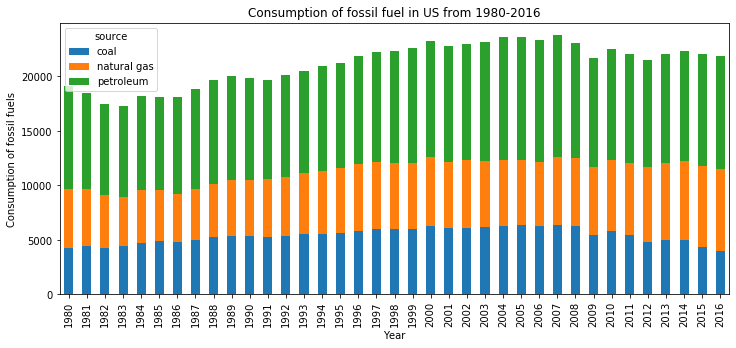

In [7]:
# Stacked bar chart to see the consumption of fossil fuels(coal, natural gas and petroleum)
pt1=df_con.plot.bar(stacked=True,figsize=(12,5),title="Consumption of fossil fuel in US from 1980-2016")
pt1.set_xlabel("Year")
pt1.set_ylabel("Consumption of fossil fuels")

Text(0, 0.5, 'Consumption of fossil fuels')

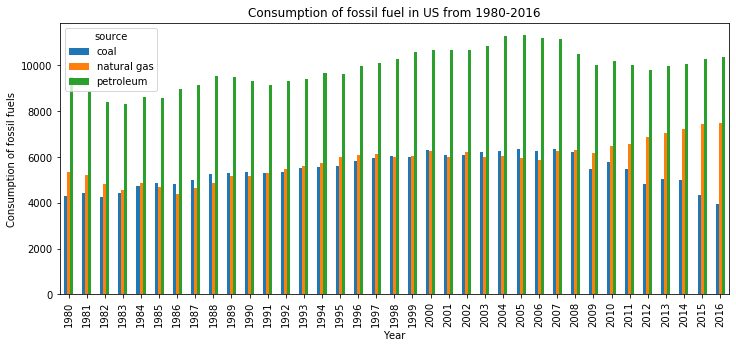

In [8]:
# bar chart for consumption of fossil fuels in US from 1980-2016
pt=df_con.plot.bar(figsize=(12,5),title="Consumption of fossil fuel in US from 1980-2016")
pt.set_xlabel("Year")
pt.set_ylabel("Consumption of fossil fuels")

# CO2 Emission by fossil fuels(Coal, Natural Gas and Petroleum)

In [9]:
# Read the files 
dir = "C:\\Users\\poonam\\Desktop\\FIU\\2019 Fall\\Data Science\\Data sets for project\\Energy\\data from my research for project\\"
emission_petro=pd.read_excel(dir+'petroleum_CO2_by_state_2016.xlsx',usecols="A:AL",skiprows=[0,1,54,55,56,57,58])

dir = "C:\\Users\\poonam\\Desktop\\FIU\\2019 Fall\\Data Science\\Data sets for project\\Energy\\data from my research for project\\"
emission_natgas=pd.read_excel(dir+'natural_gas_CO2_by_state_2016.xlsx',usecols="A:AL",skiprows=[0,1,54,55,56,57,58])

dir = "C:\\Users\\poonam\\Desktop\\FIU\\2019 Fall\\Data Science\\Data sets for project\\Energy\\data from my research for project\\"
emission_coal=pd.read_excel(dir+'coal_CO2_by_state_2016.xlsx',usecols="A:AL",skiprows=[0,1,54,55,56,57,58])
emission_natgas[:5]


,State,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Alabama,14.8,14.9,13.4,12.2,12.7,12.1,11.2,11.4,12.9,...,22.8,22.0,24.7,28.9,32.3,35.9,33.2,34.5,37.2,38.0
1,Alaska,8.2,6.5,12.6,12.7,13.7,11.4,11.1,13.3,15.3,...,19.7,18.2,18.2,17.8,18.0,18.4,17.6,17.5,17.7,17.6
2,Arizona,9.2,10.2,7.6,6.4,6.7,7.3,5.6,6.4,6.8,...,21.3,21.8,20.0,17.8,15.6,18.0,18.1,16.8,19.4,19.7
3,Arkansas,14.5,14.1,12.1,11.2,11.4,10.6,10.8,9.1,11.6,...,12.2,12.7,13.2,14.6,15.3,15.9,15.3,14.5,15.7,16.7
4,California,100.3,103.3,93.7,84.9,92.3,102.2,84.4,105.7,98.7,...,130.9,131.2,126.9,123.4,116.5,130.3,131.6,127.8,126.5,119.3


In [10]:
# Data preparation for data analysis
emission_coal['source'] = "coal"
emission_natgas['source'] = "natural gas"
emission_petro['source'] = "petroleum"

df1=emission_natgas
df1[:5]
df2 = df1.append(emission_coal)
#df2[:5]
df3 = df2.append(emission_petro)
#df3[:5]
dftotal=df3.groupby(['source']).sum()
dftotal[:5]
dftot=dftotal.transpose()
dftot[:5]

source,coal,natural gas,petroleum
1980,1443.7,1060.5,2264.0
1981,1490.1,1035.6,2094.8
1982,1430.7,964.4,1982.4
1983,1487.4,903.3,1971.0
1984,1594.4,964.7,2005.7


Text(0, 0.5, 'CO2 Emission')

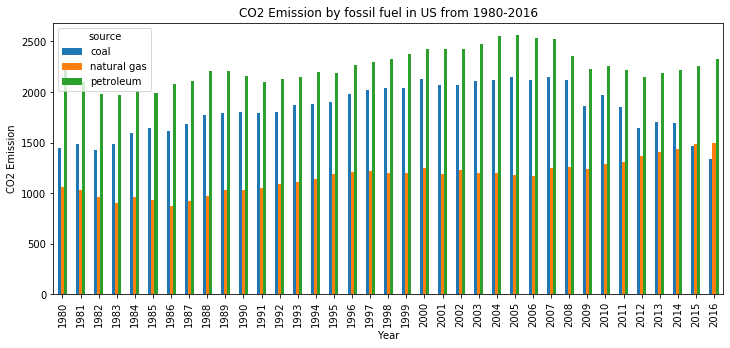

In [11]:
# Bar chart for CO2 emission by fossil fuels in US from 1980-2016
plt_bar=dftot.plot.bar(figsize=(12,5),title="CO2 Emission by fossil fuel in US from 1980-2016")
plt_bar.set_xlabel("Year")
plt_bar.set_ylabel("CO2 Emission")

Text(0, 0.5, 'CO2 Emission')

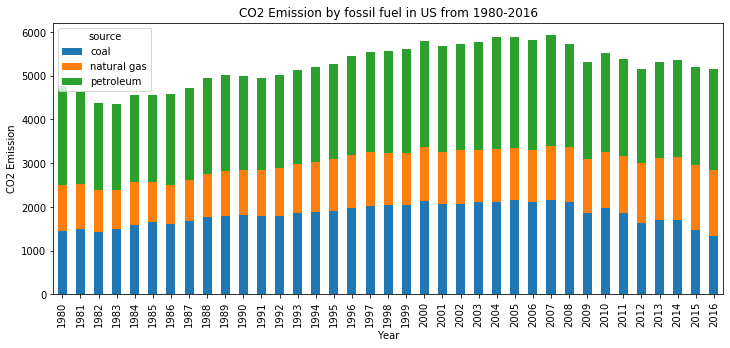

In [12]:
# Stacked bar chart(another way of reprsentation) for CO2 emission by fossil fuels in US from 1980-2016
plt_stack=dftot.plot.bar(stacked=True, figsize=(12,5),title="CO2 Emission by fossil fuel in US from 1980-2016")
plt_stack.set_xlabel("Year")
plt_stack.set_ylabel("CO2 Emission")

In [13]:
# Find the correlation between two dataset df_con(consumption dataset) and dftot(co2 emission data set)

df_con.corrwith(dftot,axis=0)

source
coal           0.999851
natural gas    0.999912
petroleum      0.972233
dtype: float64

# Relationship between Coal consumption and CO2 emission by coal

In [14]:
# The Pearson correlation coefficient measures the linear relationship between two datasets.
# Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y

pearson_coef, p_value = stats.pearsonr(df_con["coal"], dftot["coal"]) #define the columns to perform calculations on
print("Pearson Correlation Coefficient: ", pearson_coef)

Pearson Correlation Coefficient:  0.9998511781562017


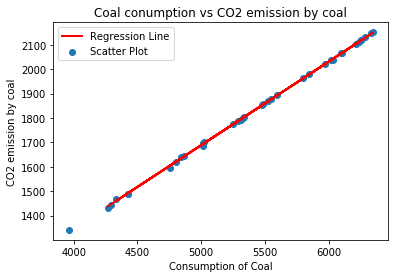

In [15]:
# Linear regression model to find the relationship between coal consumption and Co2 emission by coal
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

xc=df_con["coal"].values.reshape(-1,1)
yc=dftot["coal"].values.reshape(-1,1)

xc_train, xc_test, yc_train, yc_test = train_test_split(xc, yc, test_size=0.4, random_state=1)
reg=LinearRegression() # create a model
reg.fit(xc_train, yc_train) # fit a model
yc_pred=reg.predict(xc_test) # predict a model

plt.scatter(xc,yc,label='Scatter Plot')
plt.rcParams['figure.figsize'] = (12.0, 5.0)
plt.plot(xc_test,yc_pred,color='red',linewidth=2,label='Regression Line')
plt.xlabel('Consumption of Coal')
plt.ylabel('CO2 emission by coal')
plt.title("Coal conumption vs CO2 emission by coal")
plt.legend()
plt.show()

In [ ]:
# Cofficient of determination or r2
r2_score=reg.score(xc,yc)
print(r2_score)

# Relationship between natural gas consumption and CO2 emission by natural gas

In [ ]:
#The Pearson correlation coefficient
pearson_coef, p_value = stats.pearsonr(df_con["natural gas"], dftot["natural gas"]) #define the columns to perform calculations on
print("Pearson Correlation Coefficient: ", pearson_coef) 

In [ ]:
# Linear regression model to find the relationship between natural gas consumption and Co2 emission by natural gas
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

xng=df_con["natural gas"].values.reshape(-1,1)
yng=dftot["natural gas"].values.reshape(-1,1)

xng_train, xng_test, yng_train, yng_test = train_test_split(xng, yng, test_size=0.4, random_state=1)
reg=LinearRegression() # create a model
reg.fit(xng_train, yng_train) # fit a model
yng_pred=reg.predict(xng_test) # predict a model

plt.scatter(xng,yng,label='Scatter Plot')
plt.rcParams['figure.figsize'] = (12.0, 5.0)
plt.plot(xng_test,yng_pred,color='red',linewidth=2,label='Regression Line')
plt.xlabel('Consumption of Natural gas')
plt.ylabel('CO2 emission by natural gas')
plt.title("Natural gas conumption vs CO2 emission by natural gas")
plt.legend()
plt.show()


In [ ]:
# Cofficient of determination or r2
r2_score=reg.score(xng,yng)
print(r2_score)

# Relationship between Petroleum consumption and CO2 emission by petroleum

In [ ]:
pearson_coef, p_value = stats.pearsonr(df_con["petroleum"], dftot["petroleum"]) #define the columns to perform calculations on
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) 

In [ ]:
# Linear regression model to find the relationship between natural gas consumption and Co2 emission by natural gas
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

xp=df_con["petroleum"].values.reshape(-1,1)
yp=dftot["petroleum"].values.reshape(-1,1)

xp_train, xp_test, yp_train, yp_test = train_test_split(xp, yp, test_size=0.4, random_state=1)
reg=LinearRegression() # create a model
reg.fit(xp_train, yp_train) # fit a model
yp_pred=reg.predict(xp_test) # predict a model

plt.scatter(xp,yp,label='Scatter Plot')
plt.rcParams['figure.figsize'] = (12.0, 5.0)
plt.plot(xp_test,yp_pred,color='red',linewidth=2,label='Regression Line')
plt.xlabel('Consumption of petroleum')
plt.ylabel('CO2 emission by petroleum')
plt.title("Petroleum conumption vs CO2 emission by petroleum")
plt.legend()
plt.show()


In [ ]:
# Cofficient of determination or r2
# The coefficient of determination is a measure of the amount of variability in the data accounted for by the regression model
#Therefore, 94% of the variability in the yield data is explained by the regression model, indicating a very good fit of the model. 
#It may appear that larger values of  indicate a better fitting regression model.
r2_score=reg.score(xp,yp)
print(r2_score)